# Kaggle Competition

You are provided with daily historical sales data. The task is to forecast the total amount of products sold in every shop for the test set. Note that the list of shops and products slightly changes every month. Creating a robust model that can handle such situations is part of the challenge.

### File descriptions
- sales_train.csv - the training set. Daily historical data from January 2013 to October 2015.
- test.csv - the test set. You need to forecast the sales for these shops and products for November 2015.



Link - https://www.kaggle.com/competitions/competitive-data-science-predict-future-sales/data <br/>
Git Link - https://github.com/Neelam-Singhal/Forecast_Sales_Kaggle_Competiton <br/><br/>

Help Link - https://www.kaggle.com/code/gordotron85/future-sales-xgboost-top-3/notebook

In [89]:
import pandas as pd
import datetime
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Ignoring all warnings
import warnings
warnings.filterwarnings('ignore')

from itertools import product
import numpy as np

pd.set_option('display.max_colwidth',3000)


In [82]:
train = pd.read_csv('sales_train.csv')
items = pd.read_csv('items-translated.csv')
item_categories = pd.read_csv('item_categories-translated.csv')
shops = pd.read_csv('shops-translated.csv')


## Test
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [100]:
item_categories.head(50)

,item_category_id,item_category_name_translated
0,0,PC - Headsets / Headphones
1,1,Accessories - PS2
2,2,Accessories - PS3
3,3,Accessories - PS4
4,4,Accessories - PSP
5,5,Accessories - PSVita
6,6,Accessories - XBOX 360
7,7,Accessories - XBOX ONE
8,8,Tickets (figure)
9,9,Delivery of goods


In [97]:
shops

,shop_id,shop_name_translated,city,category
0,0,"Yakutsk Ordzhonikidze, 56 francs",Yakutsk,"Ordzhonikidze,"
1,1,"Yakutsk TC ""Central"" franc",Yakutsk,TC
2,2,"Adygea Shopping Center ""Mega""",Adygea,Shopping
3,3,"Balashikha TRK ""October-Kinomir""",Balashikha,TRK
4,4,"Volzhsky shopping center ""Volga Mall""",Volzhsky,shopping
5,5,"Vologda Shopping and Entertainment Center ""Marmalade""",Vologda,Shopping
6,6,"Voronezh (Plekhanovskaya, 13)",Voronezh,"(Plekhanovskaya,"
7,7,"Voronezh TRC ""Maksimir""",Voronezh,TRC
8,8,"Voronezh TRC City-Park ""Grad""",Voronezh,TRC
9,9,Outbound Trade,Outbound,Trade


In [96]:
shops["city"] = shops.shop_name_translated.str.split(" ").map( lambda x: x[0] )
shops["category"] = shops.shop_name_translated.str.split(" ").map( lambda x: x[1] )

In [83]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.000,1.000
1,03.01.2013,0,25,2552,899.000,1.000
2,05.01.2013,0,25,2552,899.000,-1.000
3,06.01.2013,0,25,2554,1709.050,1.000
4,15.01.2013,0,25,2555,1099.000,1.000


# Data Cleaning

### 1. Removing Outlier

<AxesSubplot:xlabel='item_cnt_day'>

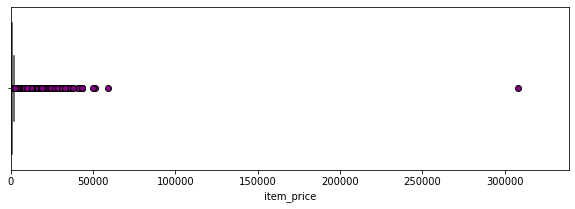

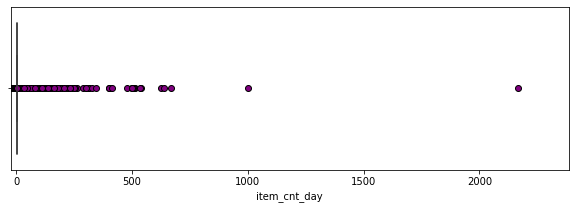

In [69]:
plt.figure(figsize=(10, 3))
flierprops = dict(marker='o', markerfacecolor='purple', markersize=6, linestyle='none', markeredgecolor='black')
plt.xlim(train.item_price.min()*1.1, train.item_price.max()*1.1)
sns.boxplot(train.item_price, flierprops = flierprops)

plt.figure(figsize=(10, 3))
plt.xlim(train.item_cnt_day.min()*1.1, train.item_cnt_day.max()*1.1)
sns.boxplot(train.item_cnt_day, flierprops = flierprops)

In [70]:
# Remving the obvious Outliers
train = train[(train.item_cnt_day < 1000) & (train.item_price < 300000)]

<AxesSubplot:xlabel='item_cnt_day'>

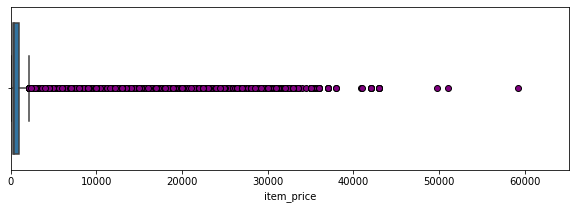

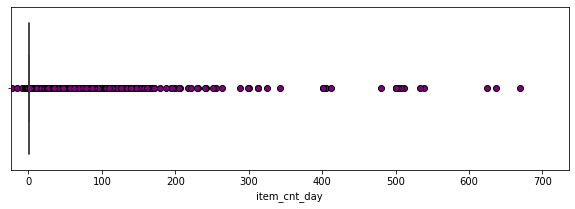

In [71]:
plt.figure(figsize=(10, 3))
flierprops = dict(marker='o', markerfacecolor='purple', markersize=6, linestyle='none', markeredgecolor='black')
plt.xlim(train.item_price.min()*1.1, train.item_price.max()*1.1)
sns.boxplot(train.item_price, flierprops = flierprops)

plt.figure(figsize=(10, 3))
plt.xlim(train.item_cnt_day.min()*1.1, train.item_cnt_day.max()*1.1)
sns.boxplot(train.item_cnt_day, flierprops = flierprops)

In [72]:
# Dropping any negative Item_price
train.drop(train[train.item_price < 0].index, inplace=True)

# Setting any negative value to 0 in item_cnt_day
train.loc[train.item_cnt_day < 1, 'item_cnt_day'] = 0
#train[train.item_cnt_day < 1] = train[train.item_cnt_day < 1].assign(item_cnt_day = 0)

In [113]:
train[train.date_block_num == 1]['item_id'].unique().shape[0]

8168

In [114]:
train[train.date_block_num == 1]['shop_id'].unique().shape[0]

46

In [115]:
8168*46

375728

In [111]:
train[train.date_block_num == 1]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
115690,21.02.2013,1,50,3880,1499.000,1.000
115691,14.02.2013,1,50,3880,1499.000,1.000
115692,21.02.2013,1,50,4128,899.000,1.000
115693,13.02.2013,1,50,4124,249.000,1.000
115694,24.02.2013,1,50,3880,1499.000,1.000
...,...,...,...,...,...,...
224298,23.02.2013,1,28,13511,1599.000,2.000
224299,26.02.2013,1,28,13511,1599.000,1.000
224300,18.02.2013,1,28,13413,1999.000,1.000
224301,20.02.2013,1,28,13413,1999.000,1.000


In [116]:
grid = []
for block_num in train['date_block_num'].unique():
    cur_shops = train[train['date_block_num']==block_num]['shop_id'].unique()
    cur_items = train[train['date_block_num']==block_num]['item_id'].unique()
    #print(block_num)
    #print(cur_shops)
    grid.append(np.array(list(product(*[cur_shops, cur_items, [block_num]])),dtype='int32'))
index_cols = ['shop_id', 'item_id', 'date_block_num']
grid = pd.DataFrame(np.vstack(grid), columns = index_cols,dtype=np.int32)

In [103]:
grid[grid.date_block_num == 3].sort_values('shop_id')

,shop_id,item_id,date_block_num
1228679,2,19235,3
1223240,2,21427,3
1223241,2,21432,3
1223242,2,17883,3
1223243,2,17864,3
...,...,...,...
1402433,59,17864,3
1402432,59,17883,3
1402431,59,21432,3
1402444,59,16024,3


In [ ]:
375728

In [88]:
train.loc[train.shop_id == 0, 'shop_id'] = 57
test.loc[test.shop_id == 0, 'shop_id'] = 57
train.loc[train.shop_id == 1, 'shop_id'] = 58
test.loc[test.shop_id == 1, 'shop_id'] = 58
train.loc[train.shop_id == 10, 'shop_id'] = 11
test.loc[test.shop_id == 10, 'shop_id'] = 11